# Analiza książek Jane Austen

W ramach analizy tekstów skupiono się na książkach Jane Austen dostępnych w ramach projektu Gutenberg. Książki, które zostaną przeanalizowane to:

   1. **"Persuasion"** - to powieść opowiadająca historię Anne Elliot, głównej bohaterki, która jest rozsądną i inteligentną kobietą. Powieść porusza tematy miłości, relacji rodzinnych i klasy społecznej. Przedstawia podróż Anne do samopoznania i złożoność jej relacji, szczególnie z kapitanem Frederickiem Wentworthem, oficerem marynarki wojennej. "Persuasion" znana jest z wnikliwego komentarza na temat społeczeństwa i umiejętnego przedstawienia ludzkich emocji przez Austen.
   
   2. **"Sense and Sensibility"** - to książka, która śledzi życie sióstr Dashwood, Elinor i Marianne, po śmierci ich ojca. Bada ich romantyczne relacje, kontrastując praktyczną i powściągliwą naturę Elinor z namiętnym i emocjonalnym usposobieniem Marianny. Powieść porusza tematy miłości, małżeństwa, oczekiwań społecznych i wyzwań stojących przed kobietami w Anglii epoki regencji. "Sense and Sensibility" prezentuje dowcip Austen, obserwacje społeczne i rozwój postaci.
   
   3. **"Emma"** - to powieść autorstwa Jane Austen, opublikowana w 1815 roku. Historia koncentruje się wokół Emmy Woodhouse, młodej kobiety z uprzywilejowanego środowiska, która uważa się za swatkę. Rozgrywająca się w fikcyjnej wiosce Highbury powieść bada złożoność miłości, przyjaźni i konsekwencje wtrącania się w życie innych ludzi. Błędne próby swatania Emmy prowadzą do nieprzewidzianych komplikacji i rozwoju osobistego. "Emma" Austen znana jest z humoru, wciągającej narracji i wnikliwego przedstawienia norm społecznych i oczekiwań tamtych czasów.

## Biblioteki 

In [ ]:
!pip install nltk
!pip install matplotlib
!pip install wordcloud
!pip install scikit-learn
!pip install pandas
!pip install textblob
!pip install gensim

In [ ]:
import nltk
nltk.download('gutenberg')
from nltk.corpus import gutenberg
from nltk import word_tokenize
from nltk.stem.snowball import SnowballStemmer
import re
import requests
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import numpy as np
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram
import pandas as pd
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
from textblob import TextBlob
from itertools import islice
import smart_open
import gensim 

## Przygotowanie tekstu

### Pobranie tekstów

In [2]:
book1 = gutenberg.raw('austen-persuasion.txt')
book2 = gutenberg.raw('austen-sense.txt')
book3 = gutenberg.raw('austen-emma.txt') 

### Wyczyszczenie tekstu

In [3]:
def clean_book(book):
    book = book.lower()
    book = re.sub(r'[^\w\s]', '', book)
    book = re.sub(r'\d+', '', book)
    book = re.sub("\n", " ", book)  
    book = re.sub("enter", " ", book)
    book = re.sub("\s{2,}", " ", book)
    book = book.strip()

    return book

In [4]:
clean_book1 = clean_book(book1)
clean_book2 = clean_book(book2)
clean_book3 = clean_book(book3)

### Tokenizacja

In [5]:
token_book1 = word_tokenize(clean_book1)
token_book2 = word_tokenize(clean_book2)
token_book3 = word_tokenize(clean_book3)

### Usunięcie stopwordów

In [6]:
path = "https://www.textfixer.com/tutorials/common-english-words.txt"

response = requests.get(path)
stopwords = response.text.split(",")

terms_book1 = [el for el in token_book1 if el not in stopwords]
terms_book2 = [el for el in token_book2 if el not in stopwords]
terms_book3 = [el for el in token_book3 if el not in stopwords]

### Steamming

In [7]:
stemmer = SnowballStemmer("english")

terms_stem_book1 = [stemmer.stem(el) for el in terms_book1]
terms_stem_book2 = [stemmer.stem(el) for el in terms_book2]
terms_stem_book3 = [stemmer.stem(el) for el in terms_book3]

### Manualne wyczyszczenie słów 

W ramach dodatkowego wyczyszczenie tekstu postanowiono dodać do stoplisty słowa, które uznano za nieistotne w kolejnych analizach. Takimi słowami są miedzy innymi: 
- imię i nazwisko autorki tekstu, które pojawia się na początku książki
- imiona i nazwiska głównych bohaterów książek
- zwroty grzecznościowe (np. sir, mrs, mr, miss) 
- słowo "chapter" chakateryzujące początek i koniec rodziału 

In [8]:
stopwords = stopwords + ['jane', 'austen', 'chapter', 'sir', 'mrs', 'mr', 'miss']
stopwords = stopwords + ['ann', 'elliot', 'wentworth ', 'dashwood', 'elinor', 'mariann', 'emma', 'woodhous', 'harrietsabout']

terms_stem_book1 = [el for el in terms_stem_book1 if el not in stopwords]
terms_stem_book2 = [el for el in terms_stem_book2 if el not in stopwords]
terms_stem_book3 = [el for el in terms_stem_book3 if el not in stopwords]

### Zliczenie wystąpień termów do chmur słów

In [9]:
def count_books(terms, amount):
    uniques = list(set(terms))
    bow = {unique: terms.count(unique) for unique in uniques}
    bow_most = {unique: digit for unique, digit in bow.items() if digit >= amount}
    bow_most_sort = {unique: digit for unique, digit in sorted(bow_most.items(), key=lambda el: el[1])}

    return bow_most_sort

In [10]:
bow_most_sort_book1 = count_books(terms_stem_book1, 10)
bow_most_sort_book2 = count_books(terms_stem_book2, 10)
bow_most_sort_book3 = count_books(terms_stem_book3, 10)

In [11]:
terms_only_book1 = [el for el in terms_stem_book1 if el not in terms_stem_book2 if el not in terms_stem_book3]
bow_most_sort_only_book1 = count_books(terms_only_book1, 10)

In [12]:
terms_only_book2 = [el for el in terms_stem_book2 if el not in terms_stem_book1 if el not in terms_stem_book3]
bow_most_sort_only_book2 = count_books(terms_only_book2, 10)

In [13]:
terms_only_book3 = [el for el in terms_stem_book3 if el not in terms_stem_book1 if el not in terms_stem_book2]
bow_most_sort_only_book3 = count_books(terms_only_book3, 10)

In [14]:
terms_all = [el for el in terms_stem_book1 if el in terms_stem_book2 if el in terms_stem_book3]
bow_most_sort_all = count_books(terms_all, 10)

## Wizualizacja - Chumry słów

### Chumra słów dla słów unikatowych dla pierwszej książki

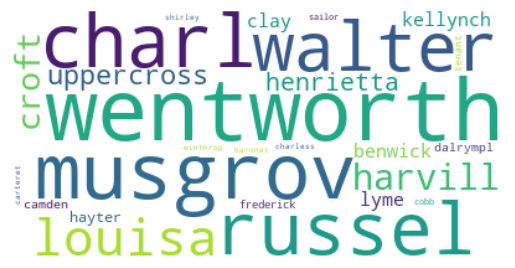

In [15]:
wordcloud = WordCloud(background_color="white").generate_from_frequencies(bow_most_sort_only_book1)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### Chumra słów dla słów unikatowych dla drugiej książki

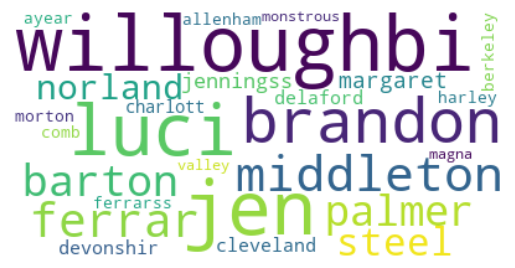

In [16]:
wordcloud = WordCloud(background_color="white").generate_from_frequencies(bow_most_sort_only_book2)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### Chumra słów dla słów unikatowych dla trzeciej książki

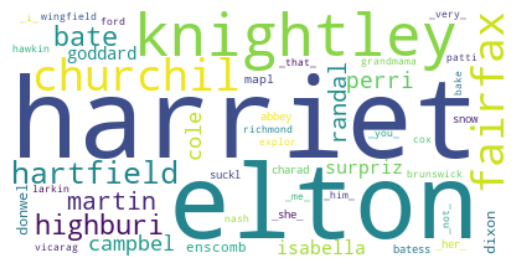

In [17]:
wordcloud = WordCloud(background_color="white").generate_from_frequencies(bow_most_sort_only_book3)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### Chumra słów najczęściej występująychc we wszystkich książkach

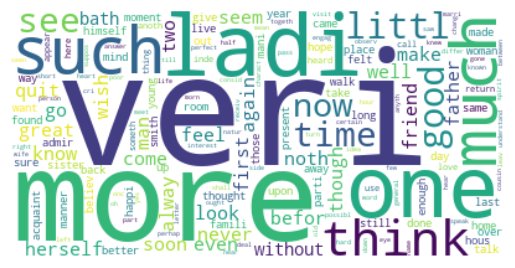

In [18]:
wordcloud = WordCloud(background_color="white").generate_from_frequencies(bow_most_sort_all)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Interpretacja wyników chmur słów

W wyniku analizy chmur słów możemy wyróżnić słowa występujące najczęściej w poszczególnych książkach:
1. Dla książki "Persuasion" to słowa odpowiadające pobocznym bohaterom książki.
2. Dla książki "Sense and Sensibility" to słowa odpowiadające pobocznym bohaterom książki, ale także słowa charakteryzujące otoczenie i obiekty - "steel", "monstrous".
3. Dla książki "Emma"  to słowa odpowiadające pobocznym bohaterom książki oraz słowa nakierowane na podróż bohaterki - "explor", "snow"

Chumra przedstawiająca wszystkie słowa najczęściej występujące w powyższych książach pokazuje, że słowa najczęściej występujące są to słowa charakteryzujące uczucia lub czasowniki opsiujące działania bohaterów - "think", "know", przymiotniki - "more", "littl" oraz przyimki takie jak "very".

Na podstawie wszystkich chumr słów możemy zauważyć, że unikatowe słowa wszystkich słów wiążą się przede wszystkim z imionami bohaterów oraz słowa, które mogą być charakterystyczne dla motywu książki - tak jak w "Emma" słowo "explor" może byc związane z jej przysłowiową wędrówką jej charakteru lub miejsc, w które się udaje.

## Zliczenie wszystkich termów i unikatowych słów

In [15]:
terms_all = [terms_stem_book1, terms_stem_book2, terms_stem_book3]
uniques = list(set([term for el in terms_all for term in el]))

print(f'Wszystkich termów jest {sum(len(array) for array in terms_all)}, ale unikatowych jest {len(uniques)}.')

Wszystkich termów jest 154645, ale unikatowych jest 9296.


### Macierz dokumnet-term (dtm)

In [16]:
def create_dtm(terms):
    
    terms_all = [term for el in terms for term in el]
    uniques = list(set(terms_all))
    matrix = np.zeros((len(terms), len(uniques)), int)
    
    for doc in range(len(terms)):
        for term in terms[doc]:
            for i, unique in enumerate(uniques):
                if unique == term: 
                    matrix[doc,i] += 1
                    
    return matrix

dtm_books = create_dtm(terms_all)

### Wizualizacja najczęściej występujących słów we wszystkich książkach

In [17]:
suma_col = dtm_books.sum(axis=0)
bow = list(zip(uniques, suma_col))
bow.sort(key=lambda el: el[1])

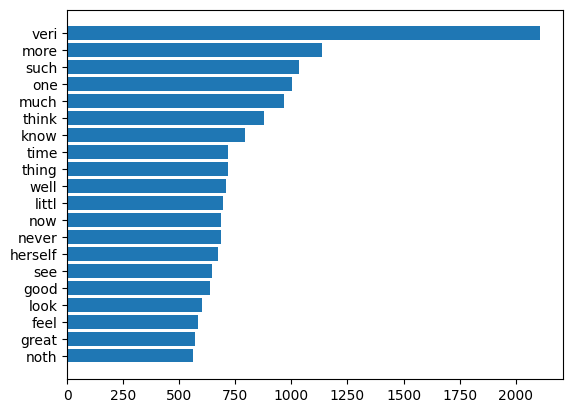

In [18]:
plt.barh(*zip(*bow[-20:]), align='center')
plt.show()

### Interpretacja występowania słów

Na podsatwie wykresu można zauważyć, że największą ilość razy (ponad 2000 razy) wystąpiło słowo "veri", co może oznaczać "very" a w języku polskim oznacza "bardzo". 
Reszta słów pokazanych na wykresie występuje średnio poniżej 1250 razy we wszystkich książkach. Większość słów są to przysłówki, liczebniki (np. "one") oraz inne części mowy pozwalające opisywać otoczenie bądź uczucia bohaterów. 

## Analiza wątków w książkach

Następną analizą jest analiza wątków - topic moddeling. Do analizy wątków użyto algorytmu Latent Dirichlet Allocation (LDA). LDA to popularny nienadzorowany algorytm uczenia maszynowego wykorzystywany do identyfikacji podstawowych tematów w dużym korpusie tekstu. Stosując LDA do dzieł Austen, spróbowano odkryć ukryte tematy i powtarzające się motywy, które definiują trzy książki autorki.

### Utworzenie listy wszystkich termów

In [19]:
terms = [terms_stem_book1, terms_stem_book2, terms_stem_book3]

### Utworzenie słownika

In [20]:
id_term = gensim.corpora.Dictionary(terms)

### Utworzenie bag-of-words

In [21]:
bow_topic = [id_term.doc2bow(term) for term in terms]

### Wyznaczenie liczby wątków

In [22]:
liczba_watkow = 3

lda_model = gensim.models.ldamodel.LdaModel(corpus=bow_topic,
                                           id2word=id_term,
                                           num_topics=liczba_watkow,                                            
                                           alpha='symmetric')

### Przypisanie liczby termów

In [23]:
liczba_termow = 8

lda_model.print_topics(num_words = liczba_termow)

[(0,
  '0.014*"veri" + 0.007*"one" + 0.007*"more" + 0.006*"much" + 0.006*"think" + 0.005*"such" + 0.005*"well" + 0.005*"littl"'),
 (1,
  '0.012*"veri" + 0.008*"such" + 0.007*"more" + 0.006*"much" + 0.006*"one" + 0.006*"think" + 0.005*"know" + 0.005*"thing"'),
 (2,
  '0.011*"veri" + 0.006*"more" + 0.005*"now" + 0.005*"such" + 0.005*"one" + 0.005*"well" + 0.005*"much" + 0.005*"ladi"')]

### Interpretacja analizy wątków 

Dostarczona analiza LDA składa się z trzech tematów, z których każdy reprezentowany jest przez listę słów i odpowiadające im prawdopodobieństwa. Oto interpretacja każdego tematu na podstawie rozkładów słów:

**Temat 0**:

- Wyróżniające się słowa: "veri", "one", "more", "much", "think", "such", "well", "littl".
- Ten temat wydaje się być związany z ogólnymi obserwacjami lub opiniami w książkach Jane Austen.
- Określenia "veri" (prawdopodobnie "bardzo") i "much" wskazują na wysoki poziom, podczas gdy "littl" sugeruje niski poziom.
- Określenia takie jak "one" i "think" mogą być związane z osobistymi punktami widzenia bohaterów książek.

**Temat 1**:
- Wyróżniające się słowa: "veri," "such," "more," "much," "one," "think," "know," "thing".
- Ten temat wydaje się omawiać ilości lub porównania obiektów w książkach.
- Podkreśla słowa "veri" odkreśla intensywność, podczas gdy "taki" i "więcej" sugerują kontekst porównawczy
- Inne słowa, takie jak "one", "think" i "know"  wskazują na osobiste perspektywy i opinie.
- Obecność słowa "know" może sugerować omawianie wiedzy lub zrozumienia w odniesieniu do ilości.
- 

**Temat 2**:
- Wyróżniające się słowa: "veri," "more," "now," "such," "one," "well," "much," "ladi".
- Ten temat wydaje się dotyczyć myśli w kontekście czasu lub sytuacji w jakiej znajdują się bohaterowie książek Jane Austen.
- Ma kilka podobnych słów do poprzednich tematów, takich jak "veri", "more", "one".
- Termin "veri" sugeruje wysoki stopień, podczas gdy "more" i "much" wskazują na rosnącą ilość. 
- Termin "now" może sugerować bieżący lub natychmiastowy kontekst, a "ladi" (prawdopodobnie "pani") może być konkretnym odniesieniem.

## Grupowanie książek

In [24]:
model_h = AgglomerativeClustering(n_clusters=None, distance_threshold = 0, metric = "euclidean", linkage ='ward')
model_h.fit_predict(dtm_books)

array([2, 1, 0], dtype=int64)

In [25]:
def plot_dendrogram(model, **kwargs):
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    dendrogram(linkage_matrix, **kwargs)

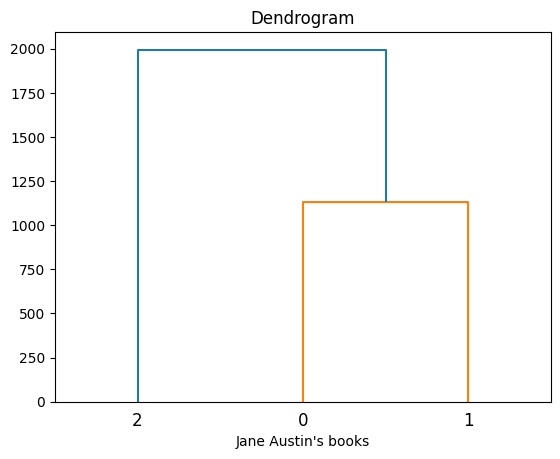

In [26]:
plt.title('Dendrogram')
plot_dendrogram(model_h, truncate_mode='level', p=3)
plt.xlabel("Jane Austin's books")
plt.show()

### Interpretacja dendrogramu

Na podstawie powyższego dendrogramu zauważono, że książka 0 - "Persuasion" oraz książka 1 - "Sense and Sensibility" są do siebie najbardziej zbliżone.

## Klasyfikacja książek 

Ze wględu na podobieństwo książki "Persuasion" oraz "Sense and Sensibility" te dwie książki wybrano do analizy klasyfikacji. Obie książki podzielono ze względu na rozdziały.

### Podział książek ze względu na rozdziały 

In [27]:
def split_by_word(text, word):
    parts = text.split(word)[1:]
    part_texts = {}
    for i, part in enumerate(parts):
        end_index = part.find('\n\n')  
        if end_index != -1:
            part = part[end_index + 2:]  
        else:
            part = part.strip()  
        part_texts[f"{word} {i+1}"] = part.strip()
    return part_texts

Książka 1 ("Persuasion") posiada rozdział zdefiniowany jako "Chapter", natomiast w książce 2 ("Sense and Sensibility") rozdziały zostały zaprezentowane jako "CHAPTER". Ze względu na te różnice zdefiniowano 2 słowa pomagające w podziale książek na rozdziały.

In [28]:
word1 = "Chapter"
word2 = "CHAPTER"
chapter_book1 = split_by_word(book1, word1)
chapter_book2 = split_by_word(book2, word2)

Po podziale książek na rozdziały dane zostały przeładowane do odpowiednich dataframe'mów oraz oczyszczone. Odpowiednim książkom zostały także nadane nazwy "Book1" i "Book2" pozwalające na dalszą analizę.

In [29]:
df_chapter_book1 = pd.DataFrame.from_dict(chapter_book1, orient='index', columns=['Text'])
df_chapter_book2 = pd.DataFrame.from_dict(chapter_book2, orient='index', columns=['Text'])

In [30]:
df_chapter_book1['Text'] = df_chapter_book1['Text'].apply(lambda x: clean_book(x))
df_chapter_book1['Text'] = df_chapter_book1['Text'].apply(lambda x: word_tokenize(x))
df_chapter_book1['Text'] = df_chapter_book1['Text'].apply(lambda x: [el for el in x if el not in stopwords])
df_chapter_book1['Text'] = df_chapter_book1['Text'].apply(lambda x: [stemmer.stem(el) for el in x])
df_chapter_book1['Text'] = df_chapter_book1['Text'].apply(lambda x: [el for el in x if el not in stopwords])
df_chapter_book1['Class'] = 'Book1'
df_chapter_book1

,Text,Class
Chapter 1,"[walter, kellynch, hall, somersetshir, man, am...",Book1
Chapter 2,"[shepherd, civil, cautious, lawyer, whatev, ho...",Book1
Chapter 3,"[take, leav, observ, walter, shepherd, one, mo...",Book1
Chapter 4,"[wentworth, former, curat, monkford, suspici, ...",Book1
Chapter 5,"[morn, appoint, admir, croft, see, kellynch, h...",Book1
Chapter 6,"[want, visit, uppercross, learn, remov, one, s...",Book1
Chapter 7,"[veri, few, day, more, captain, wentworth, kno...",Book1
Chapter 8,"[time, captain, wentworth, repeat, same, circl...",Book1
Chapter 9,"[captain, wentworth, come, kellynch, home, sta...",Book1
Chapter 10,"[opportun, make, observ, fail, occur, soon, co...",Book1


In [31]:
df_chapter_book2['Text'] = df_chapter_book2['Text'].apply(lambda x: clean_book(x))
df_chapter_book2['Text'] = df_chapter_book2['Text'].apply(lambda x: word_tokenize(x))
df_chapter_book2['Text'] = df_chapter_book2['Text'].apply(lambda x: [el for el in x if el not in stopwords])
df_chapter_book2['Text'] = df_chapter_book2['Text'].apply(lambda x: [stemmer.stem(el) for el in x])
df_chapter_book2['Text'] = df_chapter_book2['Text'].apply(lambda x: [el for el in x if el not in stopwords])
df_chapter_book2['Class'] = 'Book2'
df_chapter_book2

,Text,Class
CHAPTER 1,"[famili, long, settl, sussex, estat, larg, res...",Book2
CHAPTER 2,"[john, now, instal, herself, mistress, norland...",Book2
CHAPTER 3,"[remain, norland, sever, month, disinclin, mov...",Book2
CHAPTER 4,"[piti, edward, tast, draw, tast, draw, repli, ...",Book2
CHAPTER 5,"[sooner, answer, dispatch, indulg, herself, pl...",Book2
CHAPTER 6,"[first, part, journey, perform, melancholi, di...",Book2
CHAPTER 7,"[barton, park, half, mile, cottag, ladi, pass,...",Book2
CHAPTER 8,"[jen, widow, ampl, jointur, two, daughter, bot...",Book2
CHAPTER 9,"[now, settl, barton, toler, comfort, themselv,...",Book2
CHAPTER 10,"[preserv, margaret, more, eleg, precis, style,...",Book2


### Złączenie dwóch dataframeów w jeden 

In [32]:
all_chapter_books_df = pd.concat([df_chapter_book1, df_chapter_book2], ignore_index=True)
all_chapter_books_df

,Text,Class
0,"[walter, kellynch, hall, somersetshir, man, am...",Book1
1,"[shepherd, civil, cautious, lawyer, whatev, ho...",Book1
2,"[take, leav, observ, walter, shepherd, one, mo...",Book1
3,"[wentworth, former, curat, monkford, suspici, ...",Book1
4,"[morn, appoint, admir, croft, see, kellynch, h...",Book1
...,...,...
69,"[ill, though, weaken, kind, long, enough, make...",Book2
70,"[hear, unmov, vindic, former, favourit, rejoic...",Book2
71,"[now, found, differ, between, expect, unpleas,...",Book2
72,"[unaccount, circumst, releas, appear, whole, f...",Book2


### Macierz binarna dokument-term

In [33]:
mlb = MultiLabelBinarizer()
dtm_bin = mlb.fit_transform(all_chapter_books_df['Text'])
terms = mlb.classes_
dtm_bin_df = pd.DataFrame(dtm_bin, columns=terms)
dtm_bin_df.index = range(1, len(all_chapter_books_df) + 1)
dtm_bin_df['Class'] = 24 * ['Book1'] + 50 * ['Book2']
dtm_bin_df

,abandon,abat,abbeyland,abbrevi,abdic,abhor,abhorr,abid,abil,ablest,...,youth,youther,youthkil,youwhat,youwhen,youyou,z,zeal,zealous,Class
1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,Book1
2,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,Book1
3,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,Book1
4,0,0,0,0,0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,Book1
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Book1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,0,1,1,0,0,0,1,0,0,0,...,1,0,0,0,0,1,0,0,1,Book2
71,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Book2
72,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Book2
73,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Book2


#### Wyliczenie zbiorów wejściowych i wyjściowych

In [34]:
X = dtm_bin_df.iloc[:, :-1].values
y = dtm_bin_df.iloc[:, -1].values

#### Skalowanie danych

In [35]:
min_max_scaler = MinMaxScaler()
X_minmax = min_max_scaler.fit_transform(X)

In [36]:
pd.DataFrame(X_minmax).describe()

,0,1,2,3,4,5,6,7,8,9,...,5983,5984,5985,5986,5987,5988,5989,5990,5991,5992
count,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,...,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000
mean,0.013514,0.013514,0.013514,0.013514,0.013514,0.040541,0.054054,0.013514,0.175676,0.013514,...,0.013514,0.256757,0.013514,0.013514,0.013514,0.013514,0.040541,0.013514,0.081081,0.081081
std,0.116248,0.116248,0.116248,0.116248,0.116248,0.198569,0.227668,0.116248,0.383142,0.116248,...,0.116248,0.439826,0.116248,0.116248,0.116248,0.116248,0.198569,0.116248,0.274823,0.274823
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Przygotowanie zbioru uczącego i testowego

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X_minmax, y, test_size=0.30)
print(X_train.shape, X_test.shape)

(51, 5993) (23, 5993)


### Algorytm kNN

In [38]:
model_knn = KNeighborsClassifier(n_neighbors = 5)
model_knn.fit(X_train, y_train)

KNeighborsClassifier()

In [39]:
y_pred = model_knn.predict(X_test)

### Ocena klasyfikatora

In [40]:
porownanie = [pred == rzecz for pred, rzecz in zip (y_pred, y_test)]
print(sum(porownanie)/len(porownanie))

0.6956521739130435


In [41]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 1  7]
 [ 0 15]]
              precision    recall  f1-score   support

       Book1       1.00      0.12      0.22         8
       Book2       0.68      1.00      0.81        15

    accuracy                           0.70        23
   macro avg       0.84      0.56      0.52        23
weighted avg       0.79      0.70      0.61        23



1. **Macierz pomyłek**:
Z macierzy widać, że w zbiorze danych było 8 instancji "Book1" i 15 instancji Book2.
Book1: Algorytm poprawnie sklasyfikował 1 instancję jako Book1.
Book2: Algorytm poprawnie zaklasyfikował 15 instancji jako Book2.



2. **Precyzja**:
Precyzja dla "Book1" wynosi 1,00, co oznacza, że wszystkie przypadki przewidywane jako "Book1" były poprawne. Dla "Book2" precyzja wynosi 0,68, co oznacza, że 68% przypadków przewidywanych jako "Book2" było w rzeczywistości "Book2".



3. **Recall**:
Recall dla "Book1" wynosi 0,12, co wskazuje, że tylko 12% rzeczywistych instancji "Book1" zostało poprawnie przewidzianych. Recall dla "Book2" wynosi 1,00, co wskazuje, że wszystkie rzeczywiste instancje "Book2" zostały poprawnie przewidziane.



4. **Wynik F1**:
Wynik F1 dla Book1 wynosi 0,22, co wskazuje na słabą wydajność z powodu zerowej precyzji i wycofania.
Wynik F1 dla Book2 wynosi 0,81, co oznacza dość dobrą równowagę między precyzją i wycofaniem.



5. **Dokładność**:
Ogólna dokładność algorytmu kNN wynosi 0,695, co oznacza, że poprawnie sklasyfikował on 69.5% instancji w zbiorze danych.


### Macierz logarytmiczna dokument-term

In [42]:
mlb = MultiLabelBinarizer()
dtm_bin = mlb.fit_transform(all_chapter_books_df['Text'])
dtm_log = np.log1p(dtm_bin)
terms = mlb.classes_
dtm_log_df = pd.DataFrame(dtm_log, columns=terms)
dtm_log_df.index = range(1, len(all_chapter_books_df) + 1)
dtm_log_df['Class'] = 24 * ['Book1'] + 50 * ['Book2']
dtm_log_df

,abandon,abat,abbeyland,abbrevi,abdic,abhor,abhorr,abid,abil,ablest,...,youth,youther,youthkil,youwhat,youwhen,youyou,z,zeal,zealous,Class
1,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.693147,0.0,0.000000,0.0,0.0,0.000000,0.693147,0.000000,0.000000,Book1
2,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.693147,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.693147,Book1
3,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.693147,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.693147,0.000000,Book1
4,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.693147,0.0,0.693147,0.0,0.0,0.000000,0.000000,0.000000,0.000000,Book1
5,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,Book1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,0.0,0.693147,0.693147,0.0,0.0,0.0,0.693147,0.0,0.000000,0.0,...,0.693147,0.0,0.000000,0.0,0.0,0.693147,0.000000,0.000000,0.693147,Book2
71,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,Book2
72,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,Book2
73,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,Book2


#### Wyliczenie zbiorów wejściowych i wyjściowych

In [43]:
X = dtm_log_df.iloc[:, :-1].values
y = dtm_log_df.iloc[:, -1].values

#### Skalowanie danych

In [44]:
min_max_scaler = MinMaxScaler()
X_minmax = min_max_scaler.fit_transform(X)

In [45]:
pd.DataFrame(X_minmax).describe()

,0,1,2,3,4,5,6,7,8,9,...,5983,5984,5985,5986,5987,5988,5989,5990,5991,5992
count,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,...,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000
mean,0.013514,0.013514,0.013514,0.013514,0.013514,0.040541,0.054054,0.013514,0.175676,0.013514,...,0.013514,0.256757,0.013514,0.013514,0.013514,0.013514,0.040541,0.013514,0.081081,0.081081
std,0.116248,0.116248,0.116248,0.116248,0.116248,0.198569,0.227668,0.116248,0.383142,0.116248,...,0.116248,0.439826,0.116248,0.116248,0.116248,0.116248,0.198569,0.116248,0.274823,0.274823
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Przygotowanie zbioru uczącego i testowego

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X_minmax, y, test_size=0.30)
print(X_train.shape, X_test.shape)

(51, 5993) (23, 5993)


### Algorytm kNN

In [47]:
model_knn = KNeighborsClassifier(n_neighbors = 5)
model_knn.fit(X_train, y_train)

KNeighborsClassifier()

In [48]:
y_pred = model_knn.predict(X_test)

### Ocena klasyfikatora

In [49]:
porownanie = [pred == rzecz for pred, rzecz in zip (y_pred, y_test)]
print(sum(porownanie)/len(porownanie))

0.9130434782608695


In [50]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 4  2]
 [ 0 17]]
              precision    recall  f1-score   support

       Book1       1.00      0.67      0.80         6
       Book2       0.89      1.00      0.94        17

    accuracy                           0.91        23
   macro avg       0.95      0.83      0.87        23
weighted avg       0.92      0.91      0.91        23



1. **Macierz pomyłek**:
W zbiorze danych było 6 instancji Book1 i 17 instancji Book2.
Book1: Algorytm poprawnie sklasyfikował 4 instancje jako Book1.
Book2: Algorytm poprawnie zaklasyfikował 17 instancji jako Book2.

2. **Precyzja**:
Precyzja dla Book1 wynosi 1,00, co wskazuje, że wszystkie instancje przewidywane jako Book1 były w rzeczywistości poprawne.
Precyzja dla Book2 wynosi 0,89, co sugeruje, że 89% przypadków przewidywanych jako Book2 było rzeczywiście Book2.

3. **Recall**:
Recall dla Book1 wynosi 0,67, co wskazuje, że 67% przypadków Book1 zostało poprawnie zidentyfikowanych.
Recall dla Book2 wynosi 1,00, co oznacza, że wszystkie instancje Book2 zostały poprawnie zidentyfikowane.

4. **Wynik F1**:
Wynik F1 dla Book1 wynosi 0,80, co wskazuje na dość dobrą równowagę między precyzją i wycofaniem dla Book1.
Wynik F1 dla Book2 wynosi 0,94, co oznacza wysoką równowagę między precyzją i przywołaniem dla Book2.
Dokładność:

5. **Dokładność**:
Ogólna dokładność algorytmu kNN wynosi 0,91, co oznacza, że poprawnie sklasyfikował on 91% instancji w zbiorze danych.

### Macierz TFIDF dokument-term

In [51]:
tfidf_vectorizer = TfidfVectorizer()
texts = [' '.join(text) for text in all_chapter_books_df['Text']]
tfidf_matrix = tfidf_vectorizer.fit_transform(texts)
terms = list(tfidf_vectorizer.vocabulary_.keys())
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=terms)
tfidf_df['Class'] = 24 * ['Book1'] + 50 * ['Book2']
tfidf_df

,walter,kellynch,hall,somersetshir,man,amus,never,took,up,book,...,clemenc,doubtednor,fled,habitu,onfor,howeverin,lossh,afterday,dictateand,Class
0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.069957,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,Book1
1,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.024042,0.0,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.030264,Book1
2,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.027574,0.0,0.000000,0.0,0.0,0.000000,0.020021,0.000000,Book1
3,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.055518,0.0,0.055288,0.0,0.0,0.000000,0.000000,0.000000,Book1
4,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,Book1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,0.0,0.043097,0.043097,0.0,0.0,0.0,0.034557,0.0,0.000000,0.0,...,0.0,0.021638,0.0,0.000000,0.0,0.0,0.036637,0.000000,0.031422,Book2
70,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,Book2
71,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,Book2
72,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,Book2


#### Wyliczenie zbiorów wejściowych i wyjściowych

In [52]:
X = tfidf_df.iloc[:, :-1].values
y = tfidf_df.iloc[:, -1].values

#### Skalowanie danych

In [53]:
min_max_scaler = MinMaxScaler()
X_minmax = min_max_scaler.fit_transform(X)

In [54]:
pd.DataFrame(X_minmax).describe()

,0,1,2,3,4,5,6,7,8,9,...,5975,5976,5977,5978,5979,5980,5981,5982,5983,5984
count,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,...,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000
mean,0.013514,0.013514,0.013514,0.013514,0.013514,0.032290,0.045819,0.013514,0.092852,0.013514,...,0.013514,0.013514,0.090232,0.013514,0.013514,0.013514,0.013514,0.033636,0.058648,0.049169
std,0.116248,0.116248,0.116248,0.116248,0.116248,0.160834,0.194857,0.116248,0.222131,0.116248,...,0.116248,0.116248,0.187892,0.116248,0.116248,0.116248,0.116248,0.168175,0.203958,0.178053
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.105916,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [55]:
X_train, X_test, y_train, y_test = train_test_split(X_minmax, y, test_size=0.30)
print(X_train.shape, X_test.shape)

(51, 5985) (23, 5985)


### Algorytm kNN

In [56]:
model_knn = KNeighborsClassifier(n_neighbors = 5)
model_knn.fit(X_train, y_train)

KNeighborsClassifier()

In [57]:
y_pred = model_knn.predict(X_test)

### Ocena klasyfikatora

In [58]:
porownanie = [pred == rzecz for pred, rzecz in zip (y_pred, y_test)]
print(sum(porownanie)/len(porownanie))

0.782608695652174


In [59]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 5  5]
 [ 0 13]]
              precision    recall  f1-score   support

       Book1       1.00      0.50      0.67        10
       Book2       0.72      1.00      0.84        13

    accuracy                           0.78        23
   macro avg       0.86      0.75      0.75        23
weighted avg       0.84      0.78      0.76        23



1. **Macierz pomyłek**:
W zbiorze danych było 10 instancji Book1 i 13 instancji Book2.
Book1: Algorytm poprawnie sklasyfikował 5 instancji jako Book1.
Book2: Algorytm poprawnie zaklasyfikował 13 instancji jako Book2.

2. **Precyzja**:
Precyzja dla Book1 wynosi 1,00, co sugeruje, że wszystkie instancje przewidywane jako Book1 były rzeczywiście poprawne.
Precyzja dla Book2 wynosi 0,72, co sugeruje, że 72% przypadków przewidywanych jako "Book2" było w rzeczywistości "Book2".

3. **Recall**:
Recall dla Book1 wynosi 0,50, co sugeruje, że tylko 50% instancji Book1 zostało poprawnie zidentyfikowanych.
Recall dla Book2 wynosi 1,00, co oznacza, że wszystkie przypadki Book2 zostały poprawnie zidentyfikowane.


4. **Wynik F1**:
Wynik F1 dla Book1 wynosi 0,67, co wskazuje na umiarkowaną równowagę między precyzją i przywołaniem dla Book1.
Wynik F1 dla Book2 wynosi 0,84, co oznacza dobrą równowagę między precyzją i wycofaniem dla Book2.

5. **Dokładność**:
Ogólna dokładność algorytmu kNN wynosi 0,78, co oznacza, że poprawnie sklasyfikował on 78% instancji w zbiorze danych.

### Podsumowanie analizy klasyfikacji - porównanie 

Najlepszym klasyfikatorem spośród 3 zaprezentowanych powyżej jest klasyfikator zbudowany na podstawie macierzy dokument-term z liczebnościami ważonymi przez wagi logarytmiczne. Dokładność klasyfikatora wyniosła 91%, wówczas gdy dokładność innych klasyfikatorów wynosiła: dla klasyfikatora opartego na wagach binarnych 69.5%, a dla klasyfikatora opartego o wagi TFIDF 78%.

## Analiza nastroju

In [60]:
TextBlob(book1).sentiment

Sentiment(polarity=0.14821008177303208, subjectivity=0.5224922537955677)

1. **Polaryzacja**:
Polaryzacja mierzy sentyment wyrażony w tekście, w zakresie od -1 do 1. Dodatnia polaryzacja wskazuje na pozytywny sentyment, ujemna polaryzacja wskazuje na negatywny sentyment, a polaryzacja bliska zeru sugeruje neutralność.
W tym przypadku wartość polaryzacji wynosi 0,148, co sugeruje lekko pozytywny sentyment. Ponieważ jednak polaryzacja jest stosunkowo bliska zeru, wskazuje to na ogólnie stosunkowo neutralny sentyment.

2. **Subiektywność**:
Subiektywność mierzy stopień subiektywnych informacji w tekście, w zakresie od 0 do 1. Wartość bliższa 0 wskazuje na bardziej obiektywną treść, podczas gdy wartość bliższa 1 sugeruje wyższy stopień subiektywności lub treści opiniotwórczych.
Wartość subiektywności w tym przypadku wynosi 0,522, co wskazuje, że tekst zawiera umiarkowaną ilość subiektywnych lub opiniotwórczych informacji.

Podsumowując, wynik analizy sentymentu wskazuje na lekko pozytywny sentyment z polaryzacją 0,148. Jednak wartość subiektywności wynosząca 0,522 sugeruje, że tekst zawiera również umiarkowaną ilość subiektywnych lub opiniotwórczych informacji. 

In [61]:
TextBlob(book2).sentiment

Sentiment(polarity=0.13202853506072912, subjectivity=0.5325865497390507)

1. **Polaryzacja**:
W tym przypadku wartość polaryzacji wynosi 0,132, co sugeruje lekko pozytywny sentyment. Ponieważ jednak polaryzacja jest stosunkowo bliska zeru, wskazuje to na ogólnie stosunkowo neutralny sentyment.

2. **Subiektywność**:
Wartość subiektywności w tym przypadku wynosi 0,533, co wskazuje, że tekst zawiera umiarkowaną ilość subiektywnych lub opiniotwórczych informacji.

Podsumowując, wynik analizy sentymentu wskazuje na lekko pozytywny sentyment z polaryzacją 0,132. Jednak wartość subiektywności wynosząca 0,533 sugeruje, że tekst zawiera również umiarkowaną ilość subiektywnych lub opiniotwórczych informacji.

In [62]:
TextBlob(book3).sentiment

Sentiment(polarity=0.1569617684101289, subjectivity=0.5429318360259929)

1. **Polaryzacja**:
W tym przypadku wartość polaryzacji wynosi 0,157, co sugeruje lekko pozytywny sentyment. Ponieważ jednak polaryzacja jest stosunkowo bliska zeru, wskazuje to na ogólnie stosunkowo neutralny sentyment.

2. **Subiektywność**:
Wartość subiektywności w tym przypadku wynosi 0,543, co wskazuje, że tekst zawiera umiarkowaną ilość subiektywnych lub opiniotwórczych informacji.

Podsumowując, wynik analizy sentymentu wskazuje na lekko pozytywny sentyment z polaryzacją 0,156. Jednak wartość subiektywności wynosząca 0,543 sugeruje, że tekst zawiera również umiarkowaną ilość subiektywnych lub opiniotwórczych informacji.

Na podstawie zestawień polaryzacji we wszystkich trzech książkach można zauważyć, że żadna z książek nie jest nacechowana zbyt negatywnym bądź pozytywnym wdziękiem, lecz każda z książek jest jednak lekko pozytywna. Subiektywność wskazuje także, że nie występuje dużo subiektywnych lub opiniotwórczych informacji we wszystkich trzech książkach Jane Austen.


In [63]:
token_book1 = {token: TextBlob(token).polarity for token in book1.split()}
dict(list(token_book1.items())[60:90])

{'naturally': 0.1,
 'pity': -0.1,
 'contempt': 0.0,
 'as': 0.0,
 'turned': 0.0,
 'over': 0.0,
 'almost': 0.0,
 'endless': -0.125,
 'creations': 0.0,
 'last': 0.0,
 'century;': 0.0,
 'there,': 0.0,
 'if': 0.0,
 'every': 0.0,
 'other': -0.125,
 'leaf': 0.0,
 'powerless,': -0.5,
 'could': 0.0,
 'read': 0.0,
 'history': 0.0,
 'with': 0.0,
 'interest': 0.0,
 'which': 0.0,
 'failed.': -0.5,
 'This': 0.0,
 'page': 0.0,
 'at': 0.0,
 'favourite': 0.0,
 'volume': 0.0,
 'always': 0.0}

In [64]:
token_book2 = {token: TextBlob(token).polarity for token in book2.split()}
dict(list(token_book2.items())[440:470])

{'attendants.': 0.0,
 'dispute': 0.0,
 'right': 0.2857142857142857,
 'come;': 0.0,
 "husband's": 0.0,
 'moment': 0.0,
 'decease;': 0.0,
 'indelicacy': 0.0,
 'conduct': 0.0,
 'greater,': 0.5,
 'woman': 0.0,
 'situation,': 0.0,
 'common': -0.3,
 'feelings,': 0.0,
 'must': 0.0,
 'highly': 0.16,
 'unpleasing;--': 0.0,
 'HER': 0.0,
 'mind': 0.0,
 'sense': 0.0,
 'honor': 0.0,
 'keen,': 0.0,
 'generosity': 0.0,
 'romantic,': 0.0,
 'offence': 0.0,
 'kind,': 0.6,
 'whomsoever': 0.0,
 'given': 0.0,
 'received,': 0.0,
 'source': 0.0}

In [65]:
token_book3 = {token: TextBlob(token).polarity for token in book3.split()}
dict(list(token_book3.items())[440:470])

{'them.': 0.0,
 'acquaintance': 0.0,
 'place,': 0.0,
 'universally': 0.0,
 'civil,': 0.0,
 'one': 0.0,
 'among': 0.0,
 'them': 0.0,
 'accepted': 0.0,
 'lieu': 0.0,
 'even': 0.0,
 'melancholy': 0.0,
 'change;': 0.0,
 'sigh': 0.0,
 'over': 0.0,
 'it,': 0.0,
 'wish': 0.0,
 'impossible': -0.6666666666666666,
 'things,': 0.0,
 'till': 0.0,
 'awoke,': 0.0,
 'made': 0.0,
 'necessary': 0.0,
 'cheerful.': 0.4,
 'His': 0.0,
 'spirits': 0.0,
 'required': 0.0,
 'support.': 0.0,
 'nervous': 0.0,
 'man,': 0.0}

Dla terminów pojawiających się w każdej książce obliczono wskaźnik polaryzacji. Jednak dla większości terminów znaleziono wartość 0, co wskazuje, że książki są ogólnie neutralne. 

- W książce 1 - "Persuasion" możemy wyróżnić 5 słów, które charakterzują się wydźwiękiem negaytwym ('pity': -0.1, 'endless': -0.125, 'other': -0.125, 'powerless,': -0.5, 'failed.': -0.5) oraz 1 słowo charakteryzujące się lekko pozytwynym wydźwiękiem ('naturally': 0.1)

- W książce 2 - "Sense and Sensibility" możemy wyróżnić 1 słowo, które charakterzują się wydźwiękiem negaytwym ('common': -0.3) oraz 4 słowa charakteryzujące się pozytwynym wydźwiękiem ('right': 0.2857142857142857, 'greater,': 0.5, 'highly': 0.16, 'kind,': 0.6)

- W książce 3 - "Emma" możemy wyróżnić 1 słowo, które charakterzują się wydźwiękiem negaytwym ('cheerful.': 0.4) oraz 1 słowo charakteryzujące się pozytwynym wydźwiękiem ('impossible': -0.6666666666666666)

Należy pamiętać, że w podanej interpretacji nie podano wszystkich słów o nastroju pozytywnym i negatymym, lecz podano przkładowe wartości dla polaryzacji pozytnwej, negatywnej i neutralnej.